In [2]:
# Part 1: Study and reproduce code from Heiss & Brunner textbook
# Part 1 A

import wooldridge as woo
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

cov_xy = np.cov(x, y)[1, 0]
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 18.50118634521493

b0: 963.1913364725577



In [5]:
#Part 1 B

import wooldridge as woo
import statsmodels.formula.api as smf

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula=' salary ~ roe', data=ceosal1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



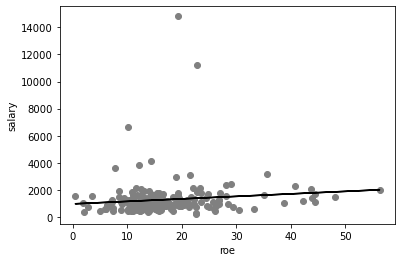

In [8]:
# Part 1 C

import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula=' salary ~ roe', data=ceosal1)
results = reg.fit()

plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.savefig('PyGraphs/Example-2-3-3.pdf')

In [9]:
# Part 1 D

import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula=' salary ~ roe', data=ceosal1)
results = reg.fit()

salary_hat = results.fittedvalues
u_hat =  results.resid

table = pd.DataFrame({'roe': ceosal1['roe'],
                     'salary': ceosal1['salary'],
                     'salary_hat': salary_hat,
                     'u_hat': u_hat})
print(f'table.head(15): n\{table.head(15)}\n')

table.head(15): n\          roe  salary   salary_hat       u_hat
0   14.100000    1095  1224.058071 -129.058071
1   10.900000    1001  1164.854261 -163.854261
2   23.500000    1122  1397.969216 -275.969216
3    5.900000     578  1072.348338 -494.348338
4   13.800000    1368  1218.507712  149.492288
5   20.000000    1145  1333.215063 -188.215063
6   16.400000    1078  1266.610785 -188.610785
7   16.299999    1094  1264.760660 -170.760660
8   10.500000    1237  1157.453793   79.546207
9   26.299999     833  1449.772523 -616.772523
10  25.900000     567  1442.372056 -875.372056
11  26.799999     933  1459.023116 -526.023116
12  14.800000    1339  1237.008898  101.991102
13  22.299999     937  1375.767778 -438.767778
14  56.299999    2011  2004.808114    6.191886



In [11]:
# Part 1 E

import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

vote1 = woo.dataWoo('vote1')
reg = smf.ols(formula=' voteA ~ shareA', data=vote1)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

table = pd.DataFrame({'b': round(results.params, 4),
                     'se': round(results.bse, 4),
                     't': round(results.tvalues, 4),
                     'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')


results.summary(): n\                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           6.63e-74
Time:                        18:52:49   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.88

In [12]:
# Part F
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

meap93 = woo.dataWoo('meap93')

reg = smf.ols(formula='math10 ~ lnchprg', data=meap93)
results = reg.fit()

n = results.nobs

u_hat_var = np.var(results.resid, ddof=1)
SER = np.sqrt (u_hat_var) * np.sqrt((n-1) / (n-2))
print(f'SER: {SER}\n')

lnchprg_sq_mean = np.mean(meap93['lnchprg'] ** 2)
lnchprg_var = np.var(meap93['lnchprg'], ddof=1)
b1_se = SER / (np.sqrt (lnchprg_var) * np.sqrt(n-1)) * np.sqrt(lnchprg_sq_mean)
b0_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n-1))
print(f'b1_se: {b1_se}\n')
print(f'b0_se: {b0_se}\n')

SER: 9.565938459482762

b1_se: 0.9975823856755014

b0_se: 0.03483933425836964



In [17]:
# Part G

import wooldridge as woo
import numpy as np
import pandas as pd
import patsy as pt

gpa1 = woo.dataWoo('gpa1')

n = len(gpa1)
k = 2
y = gpa1['colGPA']

X = pd.DataFrame({'const': 1, 'hsGPA': gpa1['hsGPA'], 'ACT': gpa1['ACT']})

y2, X2 = pt.dmatrices('colGPA ~ hsGPA + ACT', data=gpa1, return_type='dataframe')

print(f'X.head(): \n{X.head()}\n')

X = np.array(X)
y = np.array(y).reshape(n, 1)
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k -1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')


X.head(): 
   const  hsGPA  ACT
0      1    3.0   21
1      1    3.2   24
2      1    3.6   26
3      1    3.5   27
4      1    3.9   28

b: 
[[1.28632777]
 [0.45345589]
 [0.00942601]]

SER: [[0.34031576]]

se: [0.34082212 0.09581292 0.01077719]



In [42]:
# Part 2: Wooldridge Textbook Questions
# pg 58, question 3
# Table of GPA & ACT scores

import pandas as pd
import numpy as np

gpa_act = pd.read_csv('C:\\Users\\dante\\Desktop\\Wooldridge p58 Table.csv', delimiter=',', header=0,
                 names= ['Student', 'GPA', 'ACT'])
print(f'gpa_act: \n{gpa_act}\n')

# OLS Estimate

import statsmodels.formula.api as smf
reg = smf.ols(formula=' GPA ~ ACT', data=gpa_act)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

# Results interpretation: Positive linear correlation. Higher ACT -> higher GPA
# 5 point increase in ACT would lead to a 0.511 estimated increase in GPA

# Fitted values & Residuals

y = gpa_act['GPA']
X = pd.DataFrame({'const' : 1, 'act': gpa_act['ACT']})
X = np.array(X)
y = np.array(y).reshape(8, 1)   
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# ACT of 20 creates a predicted GPA of 2.61

# 50.7% of GPA variation ia explained by GPA. Adjusted R-Squared.


gpa_act: 
   Student  GPA  ACT
0        1  2.8   21
1        2  3.4   24
2        3  3.0   26
3        4  3.5   27
4        5  3.6   29
5        6  3.0   25
6        7  2.7   25
7        8  3.7   30

results.summary(): n\                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8.199
Date:                Thu, 03 Feb 2022   Prob (F-statistic):             0.0287
Time:                        10:32:07   Log-Likelihood:                0.29842
No. Observations:                   8   AIC:                             3.403
Df Residuals:                       6   BIC:                             3.562
Df Model:                           1                                         
Covariance Type:            nonrobust                               

C:\Users\dante\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
# Page 62, C1

import wooldridge as woo
import statsmodels.formula.api as smf

four_k = woo.dataWoo('401k')
print(f'four_k.mean(): n\{four_k.mean()}\n')

reg = smf.ols(formula=' prate ~ mrate', data=four_k)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

# 83.0755% of the eligible workers participate even with 0 matching
# There will be a 0.058611% increase in particiation for every 1% increase in matching

# An mrate value of 3.5 predicts participation of 100.66%. 
# Obviously you cannot have above 100%, but if the employee is matching 350% of 401k contributions, participation will be very high

# With an adjusted R-Squared of 0.074, only 7.4% variation in participation is predicted by matching. This is not a lot in my opinion.


four_k.mean(): n\prate        87.362907
mrate         0.731512
totpart    1354.230769
totelg     1628.534550
age          13.181226
totemp     3568.495437
sole          0.487614
ltotemp       6.686034
dtype: float64

results.summary(): n\                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.10e-27
Time:                        11:07:36   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust              

In [50]:
# Page 62, C3

import wooldridge as woo
sleepytime = woo.dataWoo('SLEEP75')

import statsmodels.formula.api as smf
reg = smf.ols(formula=' sleep ~ totwrk', data=sleepytime)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

# Equation: sleep = 3,586.377 - .1507 * totwrk + u
# If unemployed, someone will sleep a projected 3,586.377 minutes

# An increase of work by 2 hours will decrease sleep by 18 minutes. 18 minutes of sleeep in a week is very little, but so is 2 hours of work.
# It seems proportional

results.summary(): n\                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.99e-18
Time:                        11:29:28   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3586.3770     38.91

In [52]:
# Page 63, C6

import wooldridge as woo
mathdat = woo.dataWoo('MEAP93')

# I would predict that math scores would be positively correlated with spending because higher spending implies more resources
# math10 = B0 + B1 log(expend) + u
# B1/10 is the % change in math10 given a 10% change in expend by nature of a linear log formula

import statsmodels.formula.api as smf
reg = smf.ols(formula=' math10 ~ (lexpend)', data=mathdat)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

# math10 = -69.3411 + 11.1644 log(expend) + u

# If spending increases by 10%, math10 increases by 1.12
# The nature of being a log equation reduces the risk of high unrealistic values
 

results.summary(): n\                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           0.000475
Time:                        11:50:13   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.3411     26.53

In [57]:
# Page 63, C8

import scipy.stats as stats

np.random.seed(1234567)
n = 500
beta0 = 1
beta1 = 2
su = 6
x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

# Sample mean of x: 5.035
# Sample standard deviation of x: 2.947

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

# Sample mean of u: 0.052 - not quite 0 meaning sample is not quite normally distributed, but close

df=pd.DataFrame({'y' : y, 'x' : x})
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# Intercept is 1.24 instead of 1, x is 1.96 instead of 2. Since it is just a sampling of the dataset, it is imperfect

u_hat = results.resid
u_hat_mean = np.mean(u_hat)
print(u_hat_mean)

# U hat is very close to 0, meaning that the estimate holds
# Expected u hat was 0.05, but this is still accurate

np.random.seed(123)
n = 500
beta0 = 1
beta1 = 2
su = 6

x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

df=pd.DataFrame({'y' : y, 'x' : x})
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

# The intercept and x are different in the new sampling, but still close to the expected values.
# The difference still comes from the nature of random sampling

5.034667077395576
2.946564680914688
0.05197869216016642
5.734179046193291
b: 
Intercept    1.239251
x            1.962803
dtype: float64

6.572520305780926e-17
4.944373822186117
2.860096321967652
-0.011704334254122529
6.078033519213477
b: 
Intercept    0.653182
x            2.067777
dtype: float64



In [68]:
# Page 64, C11
import wooldridge as woo
gpa = woo.dataWoo('GPA1')

Data_summary = gpa.describe()
print(f'Data_summary:\n{Data_summary}\n')
# 141 students in sample, mean college GPA: 3.06, max college GPA: 4.0

PC_Counts = gpa.PC.value_counts()
print(PC_Counts)
# 56 students own their PC

import statsmodels.formula.api as smf
reg = smf.ols(formula=' colGPA ~ PC', data=gpa)
results = reg.fit()
print(f'results.summary(): n\{results.summary()}\n')

# colGPA = 2.99 + 0.17 (PC) + u
# If a student owns their PC, they are projected to have a 3.16 GPA. If not, 2.99.
# The adjusted R-Squared shows that only 4.3% of GPA variation is explained by PC ownership.
# The low adjusted R-Squared suggests other factors are much more significant in predicting colGPA



Data_summary:
              age        soph      junior      senior     senior5        male  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  141.000000   
mean    20.886525    0.021277    0.382979    0.503546    0.092199    0.524823   
std      1.271064    0.144819    0.487846    0.501770    0.290337    0.501164   
min     19.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     20.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     21.000000    0.000000    0.000000    1.000000    0.000000    1.000000   
75%     21.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max     30.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           campus    business    engineer      colGPA  ...       greek  \
count  141.000000  141.000000  141.000000  141.000000  ...  141.000000   
mean     0.170213    0.794326    0.035461    3.056738  ...    0.319149   
std      0.377159    0.405634    0

In [73]:
# Page 105, 3

import wooldridge as woo
sleepytime = woo.dataWoo('SLEEP75')

import pandas as pd
from sklearn import linear_model

X = sleepytime[['totwrk', 'educ', 'age']]
y = sleepytime['sleep']
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# 5 more hours of work would reduce sleep by .742 minutes per week. This is an indetectable tradeoff
# Years of education has the highest negative coefficient by a significant margin. Higher educated people sleep less.
# The R^2 states that only 11.3% of the variation in sleep is determined by these variables.
# Other factors may include commute time, having children, being currently enrolled as a student, etc
# There is likely a lot of cross correlation to totwrk since many parts of life impact work time

Intercept: 
 3638.2453117334617
Coefficients: 
 [ -0.14837344 -11.13381311   2.19988481]


In [74]:
# Page 105, 4

# B5 is less than 0 because the a better school will have a lower ranking value (closer to 1)
# All others will likely be positive
# 1 point GPA change increase will increase salary expectation by 24.8%
# A 1% increase in the volumes in the library increases salary expectation by 9.5%
# Going to a school ranked 20 spots higher increases salary expectation by 6.6%

In [75]:
# Page 106, 6

# If you pull two unbiased estimators from a larger model, the estimate of those values remains unbiased

# Theta = Beta0hat + Beta1hat
# By variance properties, Var(Theta) = Var(B0hat + B1hat)
# Var(Theta) = Var(B0hat) + Var(B1hat) + 2Cov(B0hat,B1hat)
# Var(Theta) = Var(B0hat) + Var(B1hat) + 2Corr(B0hat, B1hat) * sigmaB1 * sigmaB2

In [76]:
# Page 106, 7

# Heteroskedasticity, variable omission, and multicollinearity can all cause a biased OLS estimator

In [77]:
# Page 106, 10

# B~ and B^ should be similar if the additional variables are highly correlated to each other.
# More of the variance in B will be spread to x2 and x3, but the output will not differ too much.

# If the additional variables are correlated to each other, but not to x1, 
# there will be a meaningful difference in B~ and B^ because other factors are being considered.

# Standard errors will increase with the addition of additional variables, 
# especially since multicollinearity is given
# Only if x2 and x3 are very highly explanitory of B would the SE be lower

In [78]:
# Page 109, C2
import wooldridge as woo
hizzle = woo.dataWoo('HPRICE1')

reg = smf.ols(formula='price ~ sqrft + bdrms', data=hizzle)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# price = -19.32 + .13 (sqrft) + 15.2 (bdrms)
# 1 more bedroom = $15,198 price increase
# Add 140 sqft for that room and it's a $33,174 increase
# 62.3% of price variation is explained by these variables
# 4 bedrooms, 2,348 sq ft = $354,517
# Residual for $300k sale: -$54,517, good deal for buyer


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           3.57e-19
Time:                        16:21:41   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3150     31.047

In [84]:
# Page 110, C3
import wooldridge as woo
cizzle = woo.dataWoo('CEOSAL2')

reg = smf.ols(formula='lsalary ~ lsales + lmktval', data=cizzle)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# lsalary = 4.6209 + 0.1621*lsales + 0.1067*lmktval + e 

reg2 = smf.ols(formula='lsalary ~ lsales + lmktval + profits', data=cizzle)
results = reg2.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# There may be multicollinearity between sales and profits, since the R-Squared does not move
# These variables explain less than 30% of CEO salary

reg3 = smf.ols(formula='lsalary ~ lsales + lmktval + profits + ceoten', data=cizzle)
results = reg3.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# Salary will go up by 1.2% per year of tenure in the model

reg4 = smf.ols(formula='mktval ~ profits', data=cizzle)
results = reg4.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# 84% of market value is explained by profits. This multicollinearlity is an issue in the model

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           3.73e-14
Time:                        16:48:53   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6209      0.254

In [88]:
# Page 110, C5

guap_per_hr = woo.dataWoo('WAGE1')

Corr_coef = guap_per_hr.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

n = len(guap_per_hr)
k = 1

y = guap_per_hr['educ']
X = pd.DataFrame({'const': 1, 'exper': guap_per_hr['exper'], 'tenure': guap_per_hr['tenure'], 'educ': guap_per_hr['educ']})

X = np.array(X)
y = np.array(y).reshape(n, 1) # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

reg = smf.ols(formula='educ ~ exper + tenure', data=guap_per_hr)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

r1_hat = results.resid

reg = smf.ols(formula='np.log(wage) ~ r1_hat', data=guap_per_hr)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure', data=guap_per_hr)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')




Corr_coef:
              wage      educ     exper    tenure  nonwhite    female  \
wage      1.000000  0.405903  0.112903  0.346890 -0.038520 -0.340098   
educ      0.405903  1.000000 -0.299542 -0.056173 -0.084654 -0.085029   
exper     0.112903 -0.299542  1.000000  0.499291  0.014356 -0.041626   
tenure    0.346890 -0.056173  0.499291  1.000000  0.011589 -0.197910   
nonwhite -0.038520 -0.084654  0.014356  0.011589  1.000000 -0.010917   
female   -0.340098 -0.085029 -0.041626 -0.197910 -0.010917  1.000000   
married   0.228817  0.068881  0.316984  0.239889 -0.062259 -0.166128   
numdep   -0.053760 -0.215291 -0.056319 -0.027037  0.077701  0.033148   
smsa      0.177885  0.224309 -0.117260  0.000745 -0.014147  0.016545   
northcen -0.029124  0.061372  0.010588  0.014093 -0.080201  0.015453   
south    -0.102503 -0.116625  0.050323 -0.025067  0.102098 -0.044438   
west      0.087732  0.016343 -0.017398 -0.021291 -0.002287  0.054417   
construc  0.004034 -0.077411 -0.072841 -0.025888  0.0

In [90]:
# Page 110, C6

dollaz = woo.dataWoo('WAGE2')

reg = smf.ols(formula='IQ ~ educ', data=dollaz)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='lwage ~ educ', data=dollaz)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='lwage ~ IQ + educ', data=dollaz)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# B~1 = 0.0598
# B^1 + B^2 * sig~1 = 0.05995

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     338.0
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.16e-64
Time:                        19:20:06   Log-Likelihood:                -3717.0
No. Observations:                 935   AIC:                             7438.
Df Residuals:                     933   BIC:                             7448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6872      2.623

In [96]:
# Page 111, C8

bhm = woo.dataWoo('DISCRIM')

Data_summary = bhm.describe()
print(f'Data_summary:\n{Data_summary}\n')


reg = smf.ols(formula='psoda ~ prpblck + income', data=bhm)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# An increase in soda price by 11.5 cents per 1% increase in black population is a lot,
# but the R^2 is so low, there is likely more to the story

reg = smf.ols(formula='psoda ~ prpblck', data=bhm)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')
# The price change is smaller, but so is the R^2

reg = smf.ols(formula='lpsoda ~ prpblck + lincome', data=bhm)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# An increase in prpblck by 20% -> 2.43% increase in psoda

reg = smf.ols(formula='lpsoda ~ prpblck + lincome + prppov', data=bhm)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')
# B^ prpblck goes down

reg = smf.ols(formula='lincome ~ prppov', data=bhm)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')
# R^2 is high, but I honestly expected near perfect correlation.
# I guess there is a large variation in incomes above the poverty line in some areas.
# The issue of collinearity is present with these two variables

Data_summary:
            psoda      pfries     pentree      wagest       nmgrs       nregs  \
count  402.000000  393.000000  398.000000  390.000000  404.000000  388.000000   
mean     1.044876    0.921985    1.322186    4.615641    3.420297    3.608247   
std      0.088687    0.105881    0.643084    0.347015    1.018408    1.243540   
min      0.730000    0.670000    0.490000    4.250000    1.000000    1.000000   
25%      0.980000    0.850000    0.950000    4.250000    3.000000    3.000000   
50%      1.060000    0.930000    1.020000    4.500000    3.000000    3.000000   
75%      1.085000    1.000000    1.470000    4.950000    4.000000    4.000000   
max      1.490000    1.270000    3.950000    5.750000   10.000000    8.000000   

          hrsopen         emp      psoda2     pfries2  ...      county  \
count  410.000000  404.000000  388.000000  382.000000  ...  410.000000   
mean    14.439024   17.621906    1.044948    0.941230  ...   13.658537   
std      2.809987    9.423264    0

In [99]:
# Page 112, C12

fun_stuff = woo.dataWoo('ECONMATH')

Data_summary = fun_stuff.describe()
print(f'Data_summary:\n{Data_summary}\n')

# 0 students got a perfect score
reg = smf.ols(formula='score ~ colgpa + actmth + acteng', data=fun_stuff)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# Math predicts econ test scores at a much higher rate than english
# R^2 leaves something to be desired but is much higher than some of the others in this assignment

Data_summary:
              age        work       study      econhs      colgpa       hsgpa  \
count  856.000000  856.000000  856.000000  856.000000  856.000000  856.000000   
mean    19.406542    8.625584   13.917991    0.370327    2.814686    3.342430   
std      0.936913    9.228500    7.804398    0.483175    0.536867    0.343428   
min     18.000000    0.000000    0.000000    0.000000    0.875000    2.355000   
25%     19.000000    0.000000    8.500000    0.000000    2.445900    3.110000   
50%     19.000000    8.000000   12.000000    0.000000    2.812900    3.321500   
75%     20.000000   15.000000   18.000000    1.000000    3.206900    3.589000   
max     29.000000   37.500000   50.000000    1.000000    4.000000    4.260000   

           acteng      actmth         act     mathscr        male    calculus  \
count  814.000000  814.000000  814.000000  856.000000  856.000000  856.000000   
mean    22.594595   23.211302   23.121622    7.875000    0.500000    0.676402   
std      3.78

In [101]:
# Page 113, C13

lastproblemthankgod = woo.dataWoo('GPA1')

reg = smf.ols(formula='colGPA ~ PC', data=lastproblemthankgod)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula='colGPA ~ PC + hsGPA + ACT', data=lastproblemthankgod)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# PC shrinks a bit with other variables added. There is a big jump in R^2 too

reg = smf.ols(formula='hsGPA ~ ACT', data=lastproblemthankgod)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')
# R^2 is only .12, ACT and hsGPA are not that highly correlated

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.314
Date:                Thu, 03 Feb 2022   Prob (F-statistic):            0.00770
Time:                        20:00:57   Log-Likelihood:                -56.641
No. Observations:                 141   AIC:                             117.3
Df Residuals:                     139   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9894      0.040

In [ ]:
# Part 3
# 1. Properties of Fundamental Idempotent Matrix
# a. M' = M
# M = I - x((x'x)^-1)x'
# M' = (I - x((x'x)^-1)x')'
# M' = I - x((x'x)^-1)x' = M
# b. M * M = M
# M * M = (I - x((x'x)^-1)x')(I - x((x'x)^-1)x')
# M * M = (I + x((x'x)^-1)x'x((x'x)^-1)x' - 2x((x'x)^-1)x')
# M * M = (I - (x(x'x)^-1)x') = M

# 2. OLS is BLUE
# Proving OLS is BLUE by reaching the Gauss-Markov Result

# Bhat is linear:
# B~ = Ay where A = (x'x)^-1)x'

# Bhat is unbiased:
# Given a new estimator for B, B~ = Cy and C = (x'x)^-1)x' + D
# E(Bhat) = E[(x'x)^-1)x' + D] [xB + e]
# E(Bhat) = E[(x'x)^-1)x'xB + De + (x'x)^-1)x'e + DxB]
# E(Bhat) = B + DxB
# As long as Dx = 0, the estimator will be unbiased, meaning the original OLS
# estimator is unbiased.

# OLS has smallest variance:
# Cov(B~) = E[(B~ - E(B~))][B~ - E(B~)']
# E{[(x'x)^-1)x' + D][xB + e] - B}{[(x'x)^-1)x' + D][xB + e] - B}'
# E{[{[(x'x)^-1)x' + D]ee'[(x'x)^-1)x' + D]'}
# sigma^2[(x'x)^-1)x'(x'x)^-1)x' + DID' + (x'x)^-1)x'ID' + DI(x'x)^-1)x']
# V(B~) = sigma^2[(x'x)^-1)x' + DD'] >/ sigma^2[(x'x)^-1)x'] = V(Bhat)
